In [ ]:
##Cell 1 — Import libraries & create the dataset

In [7]:
from dataset import EllipseDataset  # your dataset class file
from torchvision import transforms
import matplotlib.pyplot as plt
import torch

# Paths to your files
images_dir = "/home/hritik/Desktop/Hritik/Files/ElGenV2_Ellipses_GBB_1M_v1/Ellipses"
annotations_path = "/home/hritik/Desktop/Hritik/Files/ElGenV2_Ellipses_GBB_1M_v1/annotations.json"

# Transforms (same as before)
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

# Create dataset object
dataset = EllipseDataset(images_dir=images_dir, annotations_path=annotations_path, transform=transform)

print(f"✅ Dataset loaded successfully with {len(dataset)} samples")


✅ Dataset loaded successfully with 1000000 samples


In [7]:
##Cell 2 — Visualize a few random samples

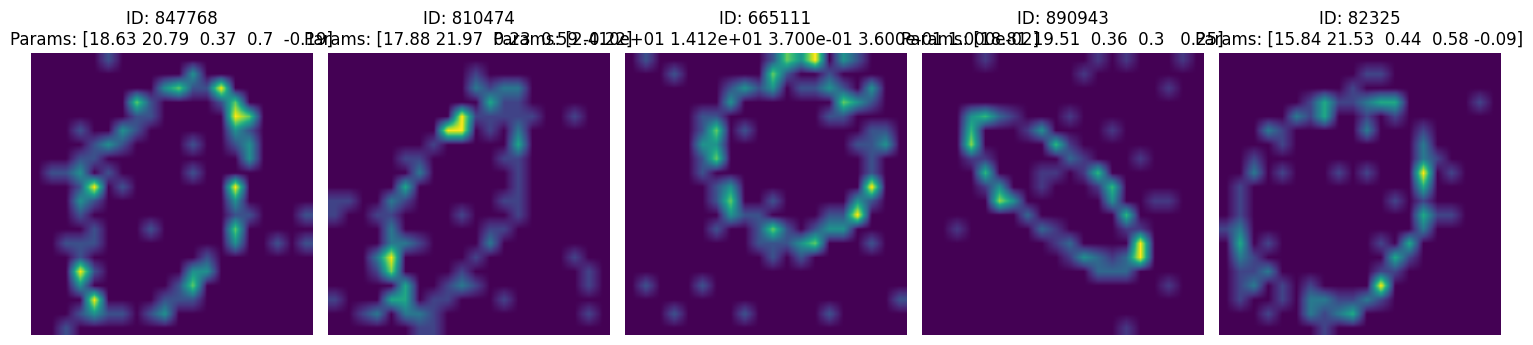

In [ ]:
import random
import numpy as np

# Pick random indices
sample_indices = random.sample(range(len(dataset)), 5)

plt.figure(figsize=(15, 5))

for i, idx in enumerate(sample_indices):
    sample = dataset[idx]
    img = sample["image"].permute(1, 2, 0).numpy()  # convert from (C, H, W) to (H, W, C)
    params = sample["params"].numpy()

    plt.subplot(1, 5, i+1)
    # If single-channel, plot as grayscale to avoid colormap coloring (blue tint)
    if img.shape[-1] == 1:
        plt.imshow(img.squeeze(), cmap='gray')
    else:
        plt.imshow(img)
    plt.axis("off")
    plt.title(f"ID: {sample['image_id']}\nParams: {np.round(params, 2)}")

plt.tight_layout()
plt.show()


In [ ]:
##Cell 3 — Inspect a larger sample (optional)

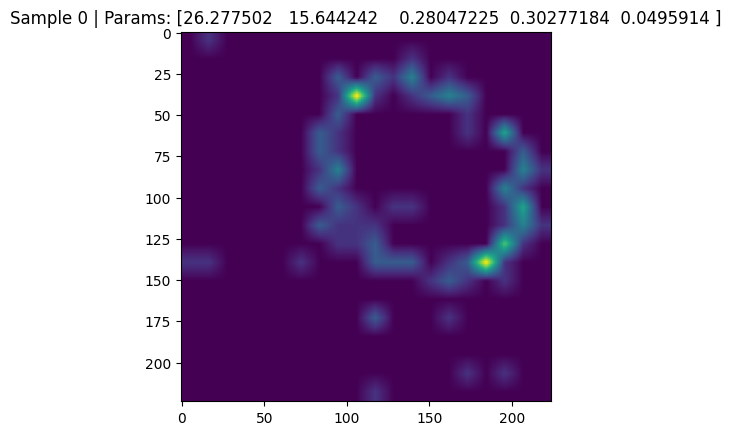

Loaded sample 0 — ID: 0


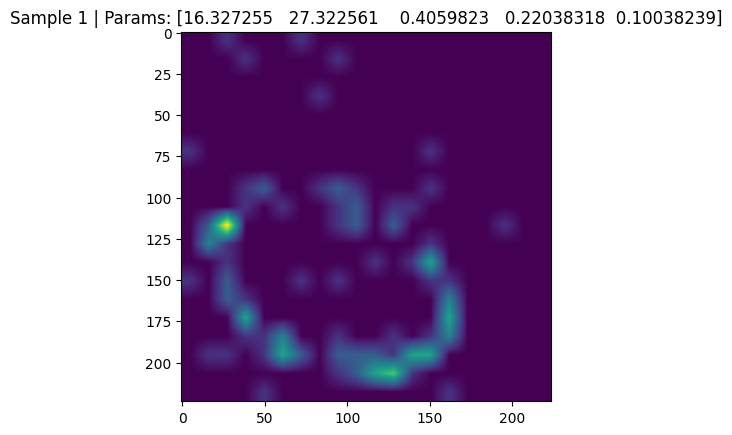

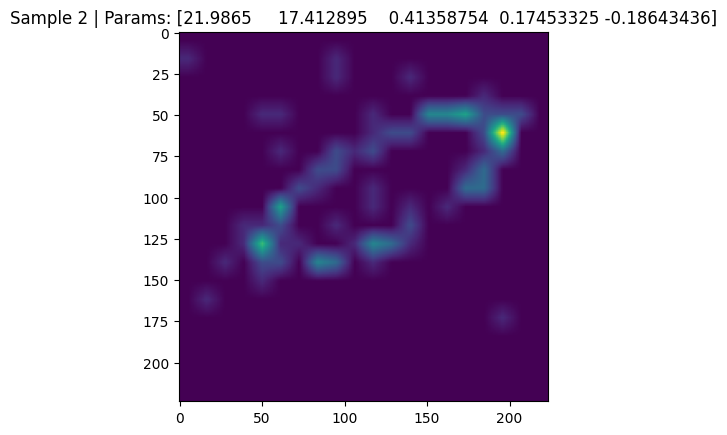

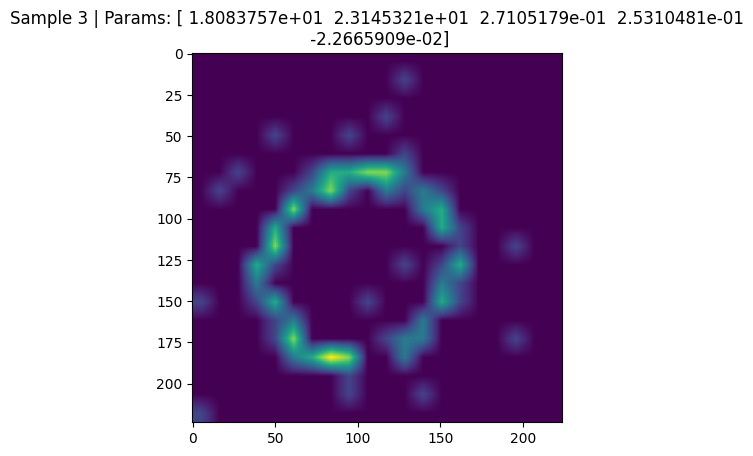

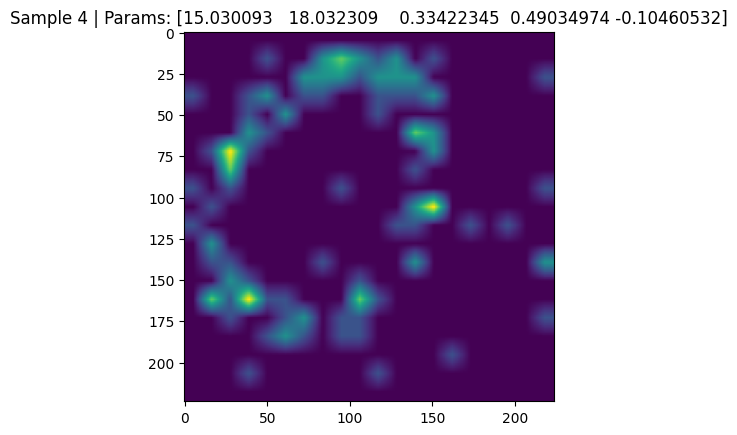

Loaded sample 100 — ID: 100
Loaded sample 200 — ID: 200
Loaded sample 300 — ID: 300
Loaded sample 400 — ID: 400
Loaded sample 500 — ID: 500
Loaded sample 600 — ID: 600
Loaded sample 700 — ID: 700
Loaded sample 800 — ID: 800
Loaded sample 900 — ID: 900


In [ ]:
for i in range(1000):
    sample = dataset[i]
    if i < 5:  # visually show first 5 only
        img = sample["image"].permute(1, 2, 0).numpy()
        # plot grayscale when single-channel to avoid color map artifacts
        if img.shape[-1] == 1:
            plt.imshow(img.squeeze(), cmap='gray')
        else:
            plt.imshow(img)
        plt.title(f"Sample {i} | Params: {sample['params'].numpy()}")
        plt.show()
    if i % 100 == 0:
        print(f"Loaded sample {i} — ID: {sample['image_id']}")
